In [2]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv(r"..\data\train_cleaned.csv")

In [4]:
X = df.drop(columns=['target'])
y = df['target']

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution for hyperparameter tuning
param_dist = {
    'max_depth': randint(3, 20),  # Random values between 3 and 20
    'min_samples_split': randint(2, 15)  # Random values between 2 and 15
}

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search for best hyperparameters
random_search = RandomizedSearchCV(tree_clf, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B9C9FFFD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B9B007E10>},
                   random_state=42, scoring='accuracy')

In [6]:
# Train the best model
best_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=14, min_samples_split=7, random_state=42)

In [7]:
# Evaluate model
y_pred = best_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.9902439024390244
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       1.00      0.99      0.99       423

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



In [8]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0.0', 'sex_1.0',
       'cp_0.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'fbs_0.0', 'fbs_1.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0',
       'slope_0.0', 'slope_1.0', 'slope_2.0', 'ca_0.0', 'ca_1.0', 'ca_2.0',
       'ca_3.0', 'ca_4.0', 'thal_0.0', 'thal_1.0', 'thal_2.0', 'thal_3.0',
       'target'],
      dtype='object')

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = best_model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9902439024390244
Precision: 0.9952267303102625
Recall: 0.9858156028368794
F1-Score: 0.9904988123515439


In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

print(cm)

[[395   2]
 [  6 417]]


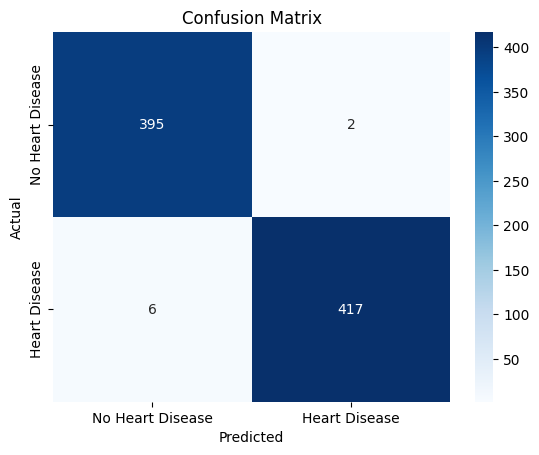

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
export_graphviz(best_model,
                out_file = "decision_tree.dot",
                feature_names = X.columns,
                class_names = ["0","1"],
                rounded = True,
                filled = True
                )

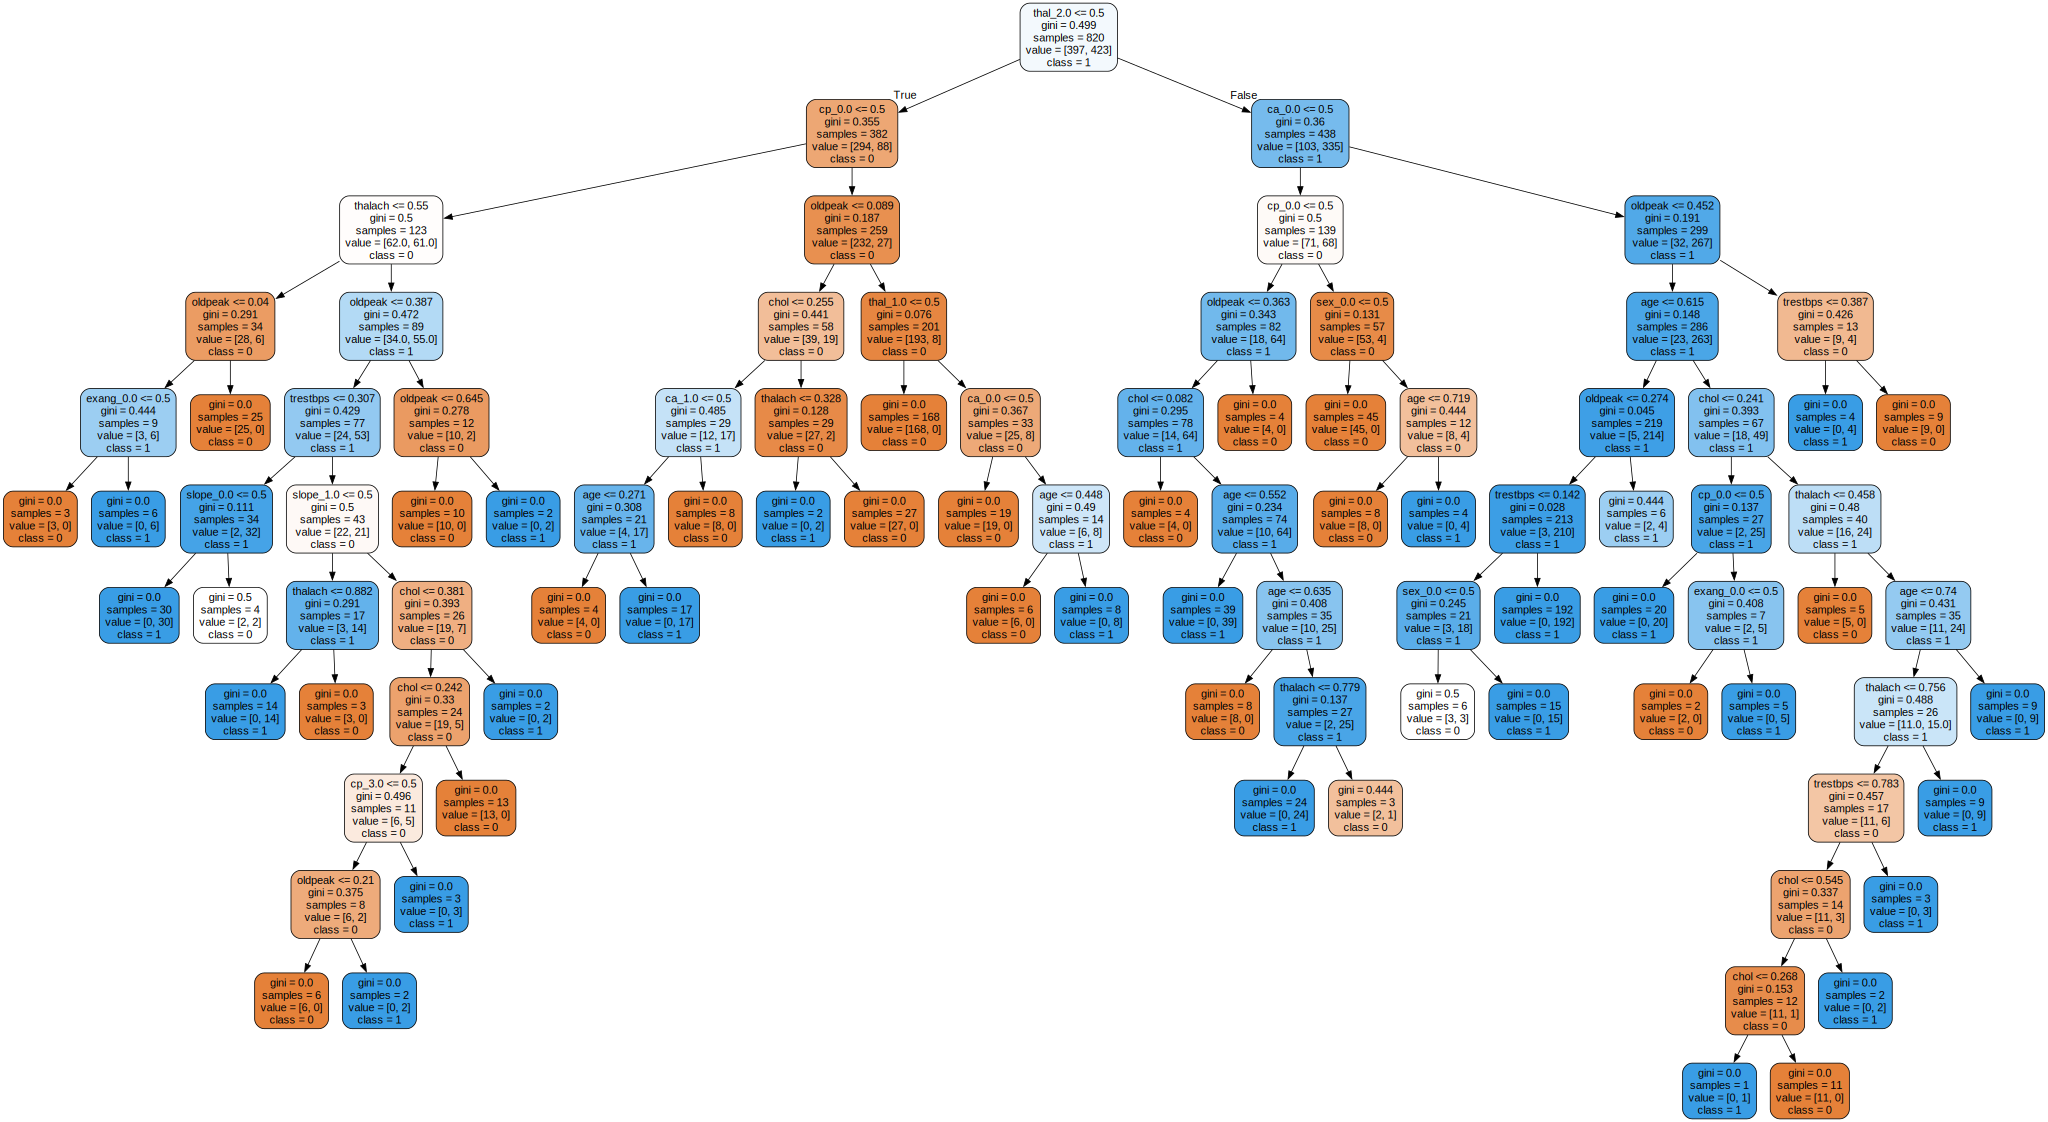

In [12]:
from graphviz import Source
Source.from_file("decision_tree.dot")